In [1]:
#/
# PERGUNTA 1- Qual a correlação entre os Atributos do Funcionários?
# PERGUNTA 2- Qual o tempo de serviço da maioria dos Funcionários?
# PERGUNTA 3- Qual a avaliação do ano anterior mais Comum?
# PERGUNTA 4- Qual a distribuição das idades dos Funcionários?
# PERGUNTA 5- Qual o número de treinamentos mais Frequente?
# PERGUNTA 6- Qual a proporção dos funcionários por Canal de Recrutamento?
# PERGUNTA 7- Qual a relação entre a promoção e a Avaliação do Ano Interior?
# OBJETIVO - Limpar e preparar os dados para então contruir um dashboard no PBI para apresentar seus resultados
# /#

#versao da linguagem python 
from platform import python_version
print('versao da linguagem python usada: ', python_version())

versao da linguagem python usada:  3.9.12


In [2]:
#Pacote usado para gravar as versões de outros pacotes usados nesse jupyter notebook

!pip install -q -U watermark

In [10]:
#Imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Versoes dos pacotes
%reload_ext watermark
%watermark -a "Data Science Academy" --inversions

In [5]:
#Carregando dados
import pandas as pd
dadosRH = pd.read_csv(r'C:\Users\raphael.lopes\OneDrive - ORIGO ENERGIA\Área de Trabalho\Bases\21-Cap13\dadosRH.csv')

dadosRH.head()

dadosRH.shape

(54808, 11)

In [7]:
#Limpeza e transformação dos dados

dadosRH.isnull().sum()

id_funcionario            0
departmento               0
regiao                    0
educacao               2409
genero                    0
canal_recrutamento        0
numero_treinamentos       0
idade                     0
aval_ano_anterior      4124
tempo_servico             0
promovido                 0
dtype: int64

In [8]:
dadosRH.groupby(['educacao']).count()

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,458,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14798,14925,14925
Superior,36669,36669,36669,36669,36669,36669,36669,33404,36669,36669


c:\Users\raphael.lopes\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='educacao', ylabel='count'>

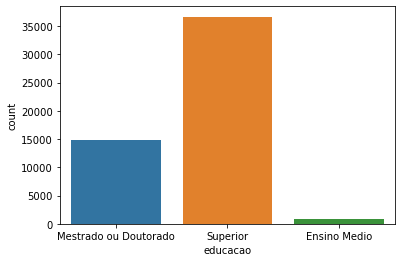

In [11]:
#Grafico de barra para analisar quantidade de funcionarios por grau de educação
sns.countplot(dadosRH['educacao'])

In [12]:
dadosRH.groupby(['aval_ano_anterior']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,5887,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4035,4225,4225,4225,4225,4225,4225
3.0,18618,18618,18618,17867,18618,18618,18618,18618,18618,18618
4.0,9877,9877,9877,9509,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11362,11741,11741,11741,11741,11741,11741


c:\Users\raphael.lopes\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aval_ano_anterior', ylabel='count'>

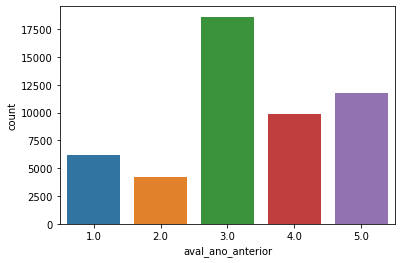

In [14]:
sns.countplot(dadosRH['aval_ano_anterior'])
